In [1]:
from os import getcwd
from os.path import abspath, join

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mpc
import numpy as np
import pickle

from src.data.load_dataset import load_mnist, load_kmnist

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

## MNIST

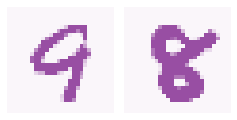

In [4]:
# plot mnist digits
train_loader, _, _ = load_mnist(seed=2)
images, labels = next(iter(train_loader))
images, labels = images.squeeze().numpy(), labels.numpy()

# create a custom colormap
cmap = mpc.LinearSegmentedColormap.from_list("", ['#ffffff', '#984ea3'])

fig = plt.figure(figsize=(4, 2))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1)
    plt.imshow(images[i + 4], cmap=cmap)
    plt.clim(-0.5, 1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_image.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

V1, (68, 11.9020)
classical, (68, 23.4560)
mistuned, (68, 25.7740)


[Text(0, 0.0, ''),
 Text(0, 0.25, ''),
 Text(0, 0.5, ''),
 Text(0, 0.75, ''),
 Text(0, 1.0, '')]

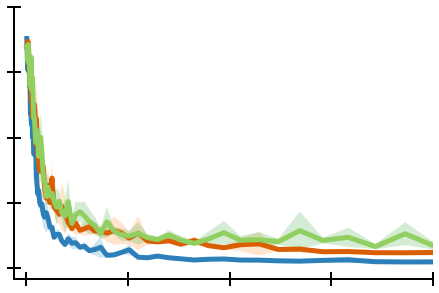

In [29]:
# load mnist results
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'}

# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)

# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f_svc.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
    
results['mistuned'] = results_mistuned['V1']
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

# plot
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))

# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([-0.04, 1.00])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
ax.set_xticklabels([])
ax.set_yticklabels([])
# plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

V1, (68, 35.7640)
classical, (68, 43.4600)
mistuned, (68, 55.7220)


(-20.0, 1000.0)

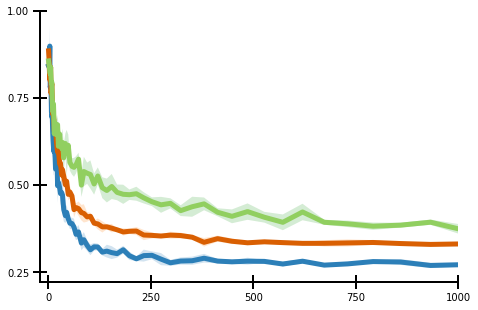

In [26]:
## plot mnist fewshot
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'}

# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.3f_few_shot_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)

# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.3f_few_shot_svc.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
    results['mistuned'] = results_mistuned['V1']
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

# plot
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([0.22, 1.00])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-20, 1000])
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_fewshot_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

### KMNIST 

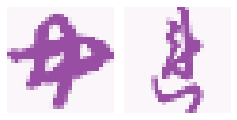

In [7]:
# plot kmnist digits
train_loader, _, _ = load_kmnist(seed=2)
images, labels = next(iter(train_loader))
images, labels = images.squeeze().numpy(), labels.numpy()

# create a custom colormap
cmap = mpc.LinearSegmentedColormap.from_list("", ['#ffffff', '#984ea3'])

fig = plt.figure(figsize=(4, 2))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1)
    plt.imshow(images[i + 4], cmap=cmap)
    plt.clim(-0.5, 1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_image.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

V1, (68, 47.2440)
classical, (68, 57.0840)
mistuned, (68, 65.9000)


(-30.0, 1000.0)

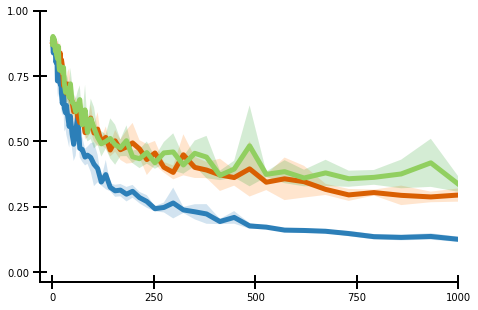

In [31]:
# load kmnist results
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 

# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
    
# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)

results['mistuned'] = results_mistuned['V1']

colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

# plot
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([-0.04, 1.00])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

V1, (68, 66.1520)
classical, (68, 73.2980)
mistuned, (68, 73.4580)


(-30.0, 1000.0)

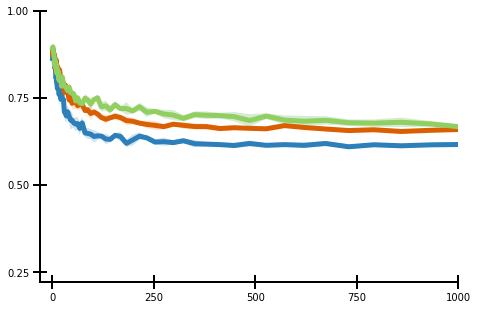

In [30]:
## plot kmnist fewshot
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 


# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f_few_shot.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
    
# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f_few_shot.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
results['mistuned'] = results_mistuned['V1']

# plot
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([0.22, 1.00])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_fewshot_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)